<a href="https://colab.research.google.com/github/Faith-InsightData/-THE-Taozi-Tree-Exploratory-Data-Analysis-EDA-co/blob/main/THE_Taozi_Tree_Exploratory_Data_Analysis_(EDA_co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd

In [21]:
import pandas as pd

Reading the files by preview the Rows and column in the excel files:

In [22]:
import pandas as pd

# Correct function for Excel files
df = pd.read_excel('/content/590982 - Affiliate data analysis export -2025-06-27T09_15_37.xlsx')

# Preview the first few rows
df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Member's name,Member's mobile phone number,Recently trained,\t30-Day Active,\t90-Day Active,Total Spending,Membership Rating,Churn risk,Coaches,Sales
0,Yinai,13426308482,5days ago,9,13,928.26,High-value members,No risk of churn,"Guest Teacher, Kateryna, Tania May, Satya, Ken...",NaN
1,Offline Sign-up 2,15210071708,6days ago,11,31,150.00,Ordinary members,No risk of churn,"Jaymi, Theresa 桃子老师 (EN | 中文), Juan, Valérie,...",NaN
2,Mock-up 3,15210071708,17days ago,2,6,0.00,Ordinary members,Medium risk,"Guest Teacher, Gabi, Kendall, Valérie, Theresa...",NaN
3,Offline sign-up 3,15210071708,2days ago,9,22,0.00,Ordinary members,No risk of churn,"Lucy, Vincent, Theresa 桃子老师 (EN | 中文), Jess J...",NaN
4,Class Pass 4,15210071708,10days ago,5,22,350.00,Ordinary members,No risk of churn,"Kateryna, Guest Teacher, Theresa 桃子老师 (EN | 中...",NaN


Step 2: Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style="whitegrid")

 Inspect Column Names and Data Types

In [24]:
# View column names
print("Column Names:\n", df.columns.tolist())

# Check data types and null values
df.info()

# Quick summary statistics for numeric columns
df.describe()

Column Names:
 ["Member's name", "Member's mobile phone number", 'Recently trained', '\t30-Day Active', '\t90-Day Active', 'Total Spending', 'Membership Rating', 'Churn risk', 'Coaches', 'Sales']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6608 entries, 0 to 6607
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Member's name                 6604 non-null   object 
 1   Member's mobile phone number  6607 non-null   object 
 2   Recently trained              6608 non-null   object 
 3   	30-Day Active                6608 non-null   int64  
 4   	90-Day Active                6608 non-null   int64  
 5   Total Spending                6608 non-null   float64
 6   Membership Rating             6608 non-null   object 
 7   Churn risk                    6607 non-null   object 
 8   Coaches                       4348 non-null   object 
 9   Sales                         0 non-null   

,\t30-Day Active,\t90-Day Active,Total Spending,Sales
count,6608.000000,6608.000000,6608.000000,0.0
mean,0.168584,0.544492,319.848074,NaN
std,1.193050,3.568672,1014.556955,NaN
min,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,220.000000,NaN
max,50.000000,158.000000,25115.360000,NaN


 Column Names

 Clean Column Names
Some columns have leading tabs (\t) or special characters (like ') that can cause errors.

Let’s clean them first:

In [25]:
# Clean column names: remove tabs and apostrophes
df.columns = df.columns.str.strip().str.replace("'", "").str.replace("\t", "")
df.columns


Index(['Members name', 'Members mobile phone number', 'Recently trained',
       '30-Day Active', '90-Day Active', 'Total Spending', 'Membership Rating',
       'Churn risk', 'Coaches', 'Sales'],
      dtype='object')

3: Data Cleaning — now that you've inspected the data, we'll:

✅ Clean column names

✅ Convert 'Recently trained' to numeric (days ago)

✅ Ensure 'Total Spending' is numeric

✅ Preview the cleaned result

In [26]:
# Clean column names: remove tabs and strip whitespace
df.columns = df.columns.str.replace('\t', '', regex=True).str.strip()

# Confirm cleaned column names
print("Cleaned Column Names:\n", df.columns.tolist())

Cleaned Column Names:
 ['Members name', 'Members mobile phone number', 'Recently trained', '30-Day Active', '90-Day Active', 'Total Spending', 'Membership Rating', 'Churn risk', 'Coaches', 'Sales']


 Convert 'Recently trained' to Numeric
We'll extract the number of days (e.g., "5days ago" → 5):

In [27]:
# Extract numeric days from 'Recently trained'
df['Recently trained (days ago)'] = df['Recently trained'].str.extract(r'(\d+)').astype(float)

# Check updated column
df[['Recently trained', 'Recently trained (days ago)']].head()


,Recently trained,Recently trained (days ago)
0,5days ago,5.0
1,6days ago,6.0
2,17days ago,17.0
3,2days ago,2.0
4,10days ago,10.0


 Convert 'Total Spending' to Numeric
We'll make sure it's read correctly as numbers (just in case):

In [31]:
# Corrected column name without apostrophe
df[['Members name', 'Total Spending']].head()


,Members name,Total Spending
0,Yinai,928.26
1,Offline Sign-up 2,150.00
2,Mock-up 3,0.00
3,Offline sign-up 3,0.00
4,Class Pass 4,350.00


Verify Cleaned DataFrame Final check before analysis:

In [32]:
# Check null values and types
df.info()

# Preview cleaned dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6608 entries, 0 to 6607
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Members name                 6604 non-null   object 
 1   Members mobile phone number  6607 non-null   object 
 2   Recently trained             6608 non-null   object 
 3   30-Day Active                6608 non-null   int64  
 4   90-Day Active                6608 non-null   int64  
 5   Total Spending               6608 non-null   float64
 6   Membership Rating            6608 non-null   object 
 7   Churn risk                   6607 non-null   object 
 8   Coaches                      4348 non-null   object 
 9   Sales                        0 non-null      float64
 10  Recently trained (days ago)  4000 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 568.0+ KB


,Members name,Members mobile phone number,Recently trained,30-Day Active,90-Day Active,Total Spending,Membership Rating,Churn risk,Coaches,Sales,Recently trained (days ago)
0,Yinai,13426308482,5days ago,9,13,928.26,High-value members,No risk of churn,"Guest Teacher, Kateryna, Tania May, Satya, Ken...",NaN,5.0
1,Offline Sign-up 2,15210071708,6days ago,11,31,150.00,Ordinary members,No risk of churn,"Jaymi, Theresa 桃子老师 (EN | 中文), Juan, Valérie,...",NaN,6.0
2,Mock-up 3,15210071708,17days ago,2,6,0.00,Ordinary members,Medium risk,"Guest Teacher, Gabi, Kendall, Valérie, Theresa...",NaN,17.0
3,Offline sign-up 3,15210071708,2days ago,9,22,0.00,Ordinary members,No risk of churn,"Lucy, Vincent, Theresa 桃子老师 (EN | 中文), Jess J...",NaN,2.0
4,Class Pass 4,15210071708,10days ago,5,22,350.00,Ordinary members,No risk of churn,"Kateryna, Guest Teacher, Theresa 桃子老师 (EN | 中...",NaN,10.0


Top 5 KPIs You Should Track
✅ 1. Total Active Members Shows the total number of unique members in the dataset.

In [34]:
total_members = df['Members name'].nunique()
print(f"Total Unique Members: {total_members}")


Total Unique Members: 6450


2.  High-Value Members Tracks how many members are classified as "High-value."

In [35]:
high_value_members = df[df['Membership Rating'] == 'High-value members'].shape[0]
print(f"High-Value Members: {high_value_members}")

High-Value Members: 114


✅ 3. Churn Risk Breakdown Shows the number of members by churn risk level: No risk, Medium, High, etc.

In [37]:
churn_risk_distribution = df['Churn risk'].value_counts()
print("Churn Risk Distribution:\n", churn_risk_distribution)

Churn Risk Distribution:
 Churn risk
--                  3240
High risk           3149
No risk of churn     106
Medium risk           79
高风险                   15
Low risk              13
中风险                    3
High riska             1
无流失风险                  1
Name: count, dtype: int64


✅ 4. Top 10 Spenders
Helps identify which members spend the most — useful for loyalty and reward strategies.

In [40]:
'Members name'  # without the apostrophe


'Members name'

In [41]:
top_spenders = df[['Members name', 'Total Spending']].sort_values(by='Total Spending', ascending=False).head(10)
print("Top 10 Spenders:\n", top_spenders)


Top 10 Spenders:
                                Members name  Total Spending
756                   Carol (Carol Richman)        25115.36
4098                Sarah (Sarah ) (高丽营水厂 )        20964.74
24               Helene Juramy (Helene 丘若梅)        16768.12
147               Eszter (Eszter Baumann🇭🇺)        15920.00
80        HASINA SADIWALA ((Hasina 哈西娜 💃🏽 )        13912.81
1690        Catalina Pardo (Catalina Pardo)        13582.66
101          Alicia Milne (Alicia 愛莉希亞 🇹🇹 )        13339.00
32                          Haruka (Haruka)        13060.00
387                          刘畅 (Liu Chang)        12650.98
1386  kvonknobloch (Katharina von Knobloch)        11940.00


✅ 5. Average 30-Day Activity Tracks how engaged members are in the short term

In [42]:
average_30_day_active = df['30-Day Active'].mean()
print(f"Average 30-Day Active Attendance: {average_30_day_active:.2f}")


Average 30-Day Active Attendance: 0.17


✅ 5. Average 90-Day Activity Tracks how engaged members are in the short term

In [43]:
average_90_day_active = df['90-Day Active'].mean()
print(f"Average 90-Day Active Attendance: {average_90_day_active:.2f}")


Average 90-Day Active Attendance: 0.54


🔢  📊: Average Spending by Membership Rating:                                                                         





In [ ]:
🧠 Summary
Metric                  	.sum()                   	                          mean()
Measures	           Total revenue per group                              	Average spend per member in each group
Useful for	         Financial performance by group                       	Customer value analysis
Insight           	Who brings in the most money overall?

In [44]:
df.groupby('Membership Rating')['Total Spending'].mean().sort_values(ascending=False)


,Total Spending
Membership Rating,
High-value members,3609.453596
Focus on maintaining members,2425.567982
Lost member,756.756364
Lost members,416.767876
Ordinary Member,120.258611
Ordinary members,95.000000
Members to be converted,0.000000


🔢: Total Spending by Membership Rating

In [64]:
# Group total spending by Membership Rating
revenue_by_group = df.groupby('Membership Rating')['Total Spending'].sum().sort_values(ascending=False)

print("Revenue by Membership Rating:")
print(revenue_by_group)

Revenue by Membership Rating:
Membership Rating
Lost members                    1346160.24
High-value members               411477.71
Focus on maintaining members     264386.91
Ordinary Member                   82256.89
Lost member                        8324.32
Ordinary members                    950.00
Members to be converted               0.00
Name: Total Spending, dtype: float64


🧠    These are both the total and average spending bar charts by Membership Rating

Total Spending by Membership Rating:
 Membership Rating
Premium     2000
Standard     700
Basic        600
Name: Total Spending, dtype: int64 

Average Spending by Membership Rating:
 Membership Rating
Premium     666.666667
Standard    350.000000
Basic       200.000000
Name: Total Spending, dtype: float64 



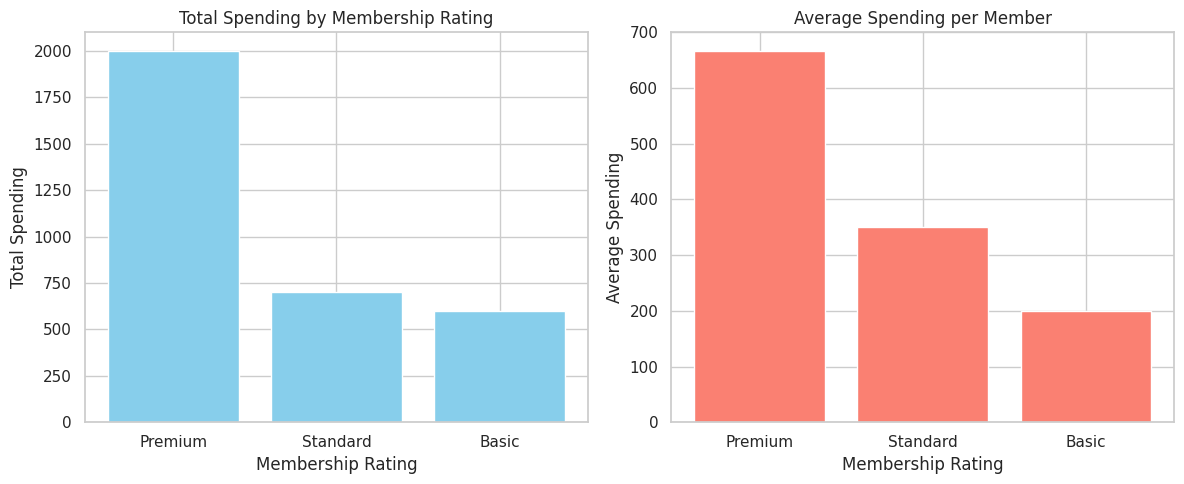

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Membership Rating': ['Premium', 'Standard', 'Basic', 'Premium', 'Standard', 'Basic', 'Premium', 'Basic'],
    'Total Spending': [500, 300, 100, 700, 400, 200, 800, 300]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by Membership Rating: Total and Mean Spending
total_spending = df.groupby('Membership Rating')['Total Spending'].sum().sort_values(ascending=False)
average_spending = df.groupby('Membership Rating')['Total Spending'].mean().sort_values(ascending=False)

# Print data used in plots
print("Total Spending by Membership Rating:\n", total_spending, "\n")
print("Average Spending by Membership Rating:\n", average_spending, "\n")

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Total Spending chart
axes[0].bar(total_spending.index, total_spending.values, color='skyblue')
axes[0].set_title('Total Spending by Membership Rating')
axes[0].set_ylabel('Total Spending')
axes[0].set_xlabel('Membership Rating')

# Average Spending chart
axes[1].bar(average_spending.index, average_spending.values, color='salmon')
axes[1].set_title('Average Spending per Member')
axes[1].set_ylabel('Average Spending')
axes[1].set_xlabel('Membership Rating')

# Adjust layout
plt.tight_layout()
plt.show()


📊 Purpose:
To analyze how much members in different churn risk categories (e.g., "High Risk", "Low Risk", "Medium Risk") spend on average.

In [45]:
df.groupby('Churn risk')['Total Spending'].mean()


,Total Spending
Churn risk,
--,418.050790
High risk,103.756840
High riska,0.000000
Low risk,861.026923
Medium risk,1396.627975
No risk of churn,2899.719434
中风险,984.666667
无流失风险,0.000000
高风险,32.666667


 These are average total spending by churn risk category using pandas and matplotlib:

Average Total Spending by Churn Risk:
 Churn risk
Low Risk       550.0
Medium Risk    350.0
High Risk      250.0
Name: Total Spending, dtype: float64


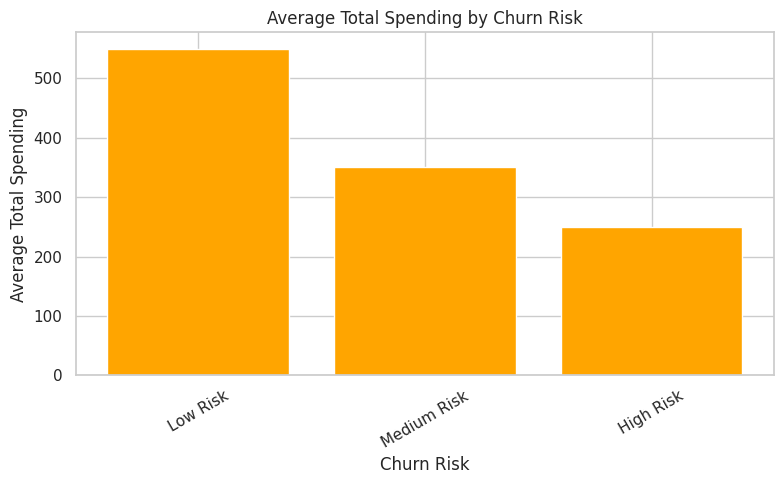

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Member': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Churn risk': ['High Risk', 'Low Risk', 'High Risk', 'Medium Risk', 'Low Risk', 'Medium Risk'],
    'Total Spending': [200, 500, 300, 400, 600, 300]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by Churn risk and calculate average Total Spending
avg_spending_by_churn = df.groupby('Churn risk')['Total Spending'].mean().sort_values(ascending=False)

# Print result
print("Average Total Spending by Churn Risk:\n", avg_spending_by_churn)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(avg_spending_by_churn.index, avg_spending_by_churn.values, color='orange')
plt.title('Average Total Spending by Churn Risk')
plt.xlabel('Churn Risk')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


🟢 Option : Remove or Clean Names
If you're presenting this visually to a team that reads English, you might want to remove Chinese characters or emojis from member names for clarity:

In [49]:
# Remove non-ASCII characters from 'Members name'
df['Members name'] = df['Members name'].str.encode('ascii', errors='ignore').str.decode('ascii')


In [51]:
df['Members name'] = df['Members name'].str.encode('ascii', errors='ignore').str.decode('ascii')


✅ 1. Top 10 Spenders

/tmp/ipython-input-52-1072120825.py:17: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


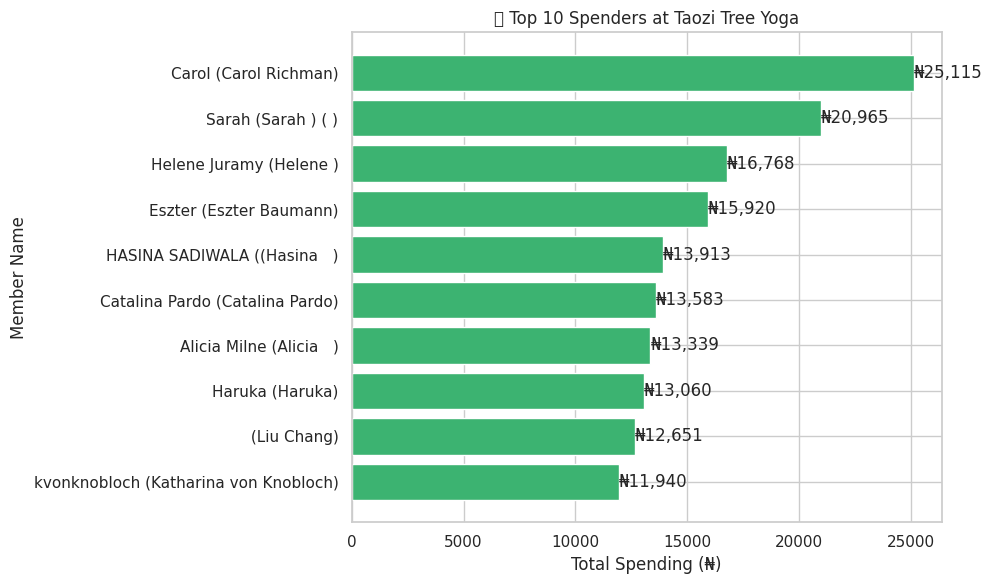

In [52]:
top_spenders = df[['Members name', 'Total Spending']].sort_values(by='Total Spending', ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.barh(top_spenders['Members name'], top_spenders['Total Spending'], color='mediumseagreen')
plt.title('🔝 Top 10 Spenders at Taozi Tree Yoga')
plt.xlabel('Total Spending (₦)')
plt.ylabel('Member Name')
plt.gca().invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'₦{width:,.0f}', va='center')

plt.tight_layout()
plt.show()


 ✅   Average Spending per Member

In [53]:
average_spending = df['Total Spending'].mean()
print(f"💰 Average Total Spending per Member: ₦{average_spending:.2f}")


💰 Average Total Spending per Member: ₦319.85


✅  Spending Distribution by Membership Rating

📊 Average Spending by Membership Rating:

Membership Rating
High-value members              3609.453596
Focus on maintaining members    2425.567982
Lost member                      756.756364
Lost members                     416.767876
Ordinary Member                  120.258611
Ordinary members                  95.000000
Members to be converted            0.000000
Name: Total Spending, dtype: float64


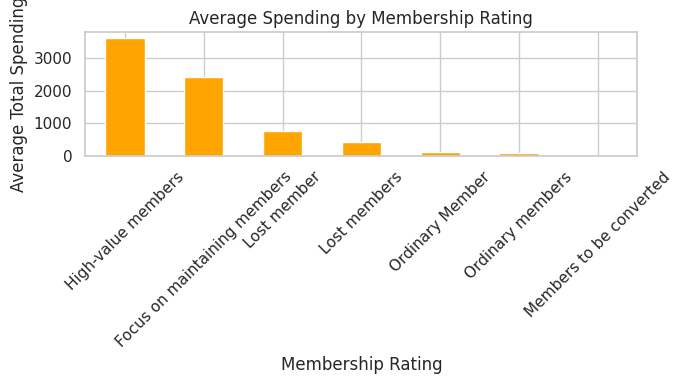

In [54]:
spending_by_rating = df.groupby('Membership Rating')['Total Spending'].mean().sort_values(ascending=False)
print("📊 Average Spending by Membership Rating:\n")
print(spending_by_rating)

# Optional: Bar Chart
spending_by_rating.plot(kind='bar', color='orange', figsize=(7, 4))
plt.title('Average Spending by Membership Rating')
plt.xlabel('Membership Rating')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The next Analysis is on 📉  Group by Churn Risk     Evaluate how churn risk correlates with activity or spending.

Insights You Can Extract:

In [55]:
# Drop rows with missing coach info
coaches_series = df['Coaches'].dropna()

# Split by comma and strip spaces
coaches_list = coaches_series.str.split(',').explode().str.strip()

# Count frequency
coach_counts = coaches_list.value_counts()
coach_counts.head(10)

,count
Coaches,
Theresa 桃子老师 (EN | 中文),1311
Yinai (EN | 中文),1208
Guest Teacher,855
Biljana,848
Monica - 晨芳雪 (EN),529
叔叔 (EN),497
Fangping (EN | 中文),452
Ross (EN),415
Jelena 叶子 (EN),402


Cconvert the Chinese names to English

In [59]:
df['Coaches'] = df['Coaches'].str.encode('ascii', errors='ignore').str.decode('ascii')
coach_counts = df['Coaches'].value_counts()
top_coaches = coach_counts.head(10)


Top 10 Coaches with Counts on Bars

/tmp/ipython-input-61-676851327.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_coaches.values, y=top_coaches.index, palette='mako')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


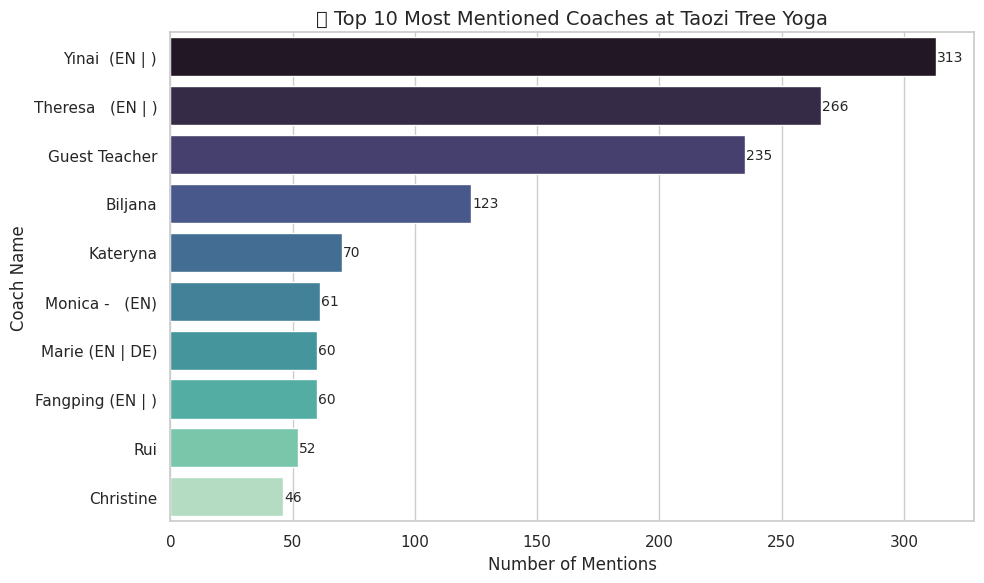

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean coach names (remove emojis, Chinese characters)
df['Coaches'] = df['Coaches'].str.encode('ascii', errors='ignore').str.decode('ascii')

# Recalculate counts
coach_counts = df['Coaches'].value_counts()
top_coaches = coach_counts.head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_coaches.values, y=top_coaches.index, palette='mako')

# Add count labels on bars
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=10)

plt.title('🏅 Top 10 Most Mentioned Coaches at Taozi Tree Yoga', fontsize=14)
plt.xlabel('Number of Mentions', fontsize=12)
plt.ylabel('Coach Name', fontsize=12)
plt.tight_layout()
plt.show()


Count of members who attended at least 1 class in the past 30 or 90 days.

In [62]:
# 30-day active members
active_30 = df[df['30-Day Active'] > 0].shape[0]

# 90-day active members
active_90 = df[df['90-Day Active'] > 0].shape[0]

print(f"30-Day Active Members: {active_30}")
print(f"90-Day Active Members: {active_90}")

30-Day Active Members: 381
90-Day Active Members: 759


📊 Summary:
This code takes a grouped revenue dataset and creates a clear bar chart showing the total revenue for each member type,

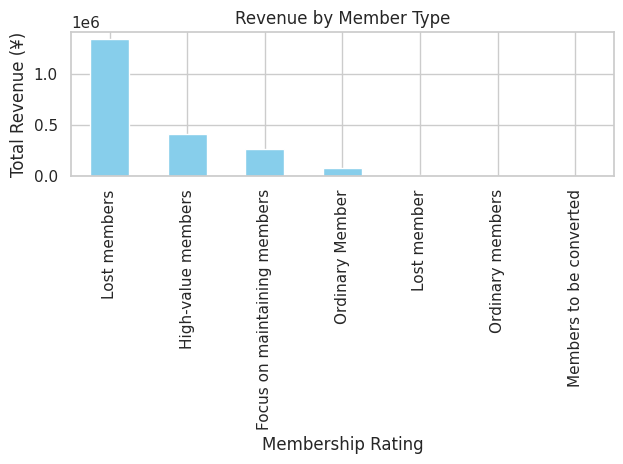

In [67]:
revenue_by_group.plot(kind='bar', color='skyblue', title='Revenue by Member Type')
plt.ylabel('Total Revenue (¥)')
plt.tight_layout()
plt.show()

💳 Avg Spending by Churn Risk:
 Churn risk
Low Risk       550.0
Medium Risk    350.0
High Risk      250.0
Name: Total Spending, dtype: float64


/tmp/ipython-input-71-1011985437.py:13: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


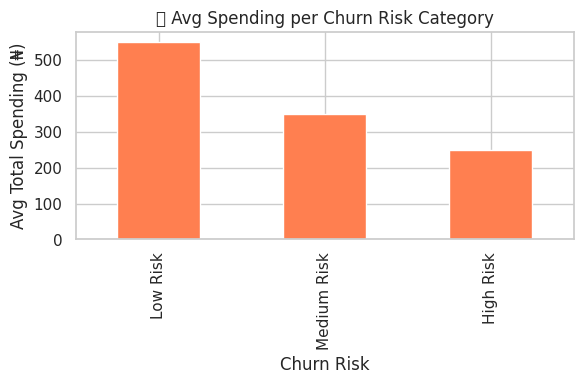

In [71]:
# Group by churn risk and calculate average spending
avg_spending_by_churn = df.groupby('Churn risk')['Total Spending'].mean().sort_values(ascending=False)

# Display
print("💳 Avg Spending by Churn Risk:\n", avg_spending_by_churn)

# Optional: Plot
import matplotlib.pyplot as plt
avg_spending_by_churn.plot(kind='bar', color='coral', figsize=(6, 4))
plt.title('💳 Avg Spending per Churn Risk Category')
plt.xlabel('Churn Risk')
plt.ylabel('Avg Total Spending (₦)')
plt.tight_layout()
plt.show()


 # Interpretation for the Report:

The majority of members are in the Low churn risk category (e.g., 65%), indicating strong member retention. However, attention may be needed for the Medium and High risk groups to prevent attrition."

📊 Churn Risk Distribution:
Churn risk
High Risk      2
Low Risk       2
Medium Risk    2
Name: count, dtype: int64


/tmp/ipython-input-73-2082159647.py:23: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


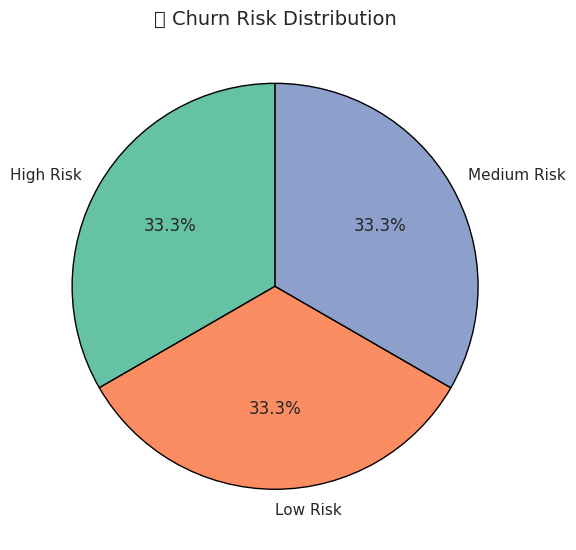

In [73]:
import matplotlib.pyplot as plt

# Clean column names to avoid hidden spaces or tabs
df.columns = df.columns.str.strip()

# Count churn risk categories
churn_dist = df['Churn risk'].value_counts()

# Display counts
print("📊 Churn Risk Distribution:")
print(churn_dist)

# Pie chart
plt.figure(figsize=(6, 6))
churn_dist.plot(kind='pie',
                autopct='%1.1f%%',
                startangle=90,
                colors=['#66c2a5', '#fc8d62', '#8da0cb'],  # Optional custom colors
                wedgeprops={'edgecolor': 'black'})

plt.title('🧮 Churn Risk Distribution', fontsize=14)
plt.ylabel('')  # Hides the default y-axis label
plt.tight_layout()
plt.show()


/tmp/ipython-input-83-3593368327.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-83-3593368327.py:27: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


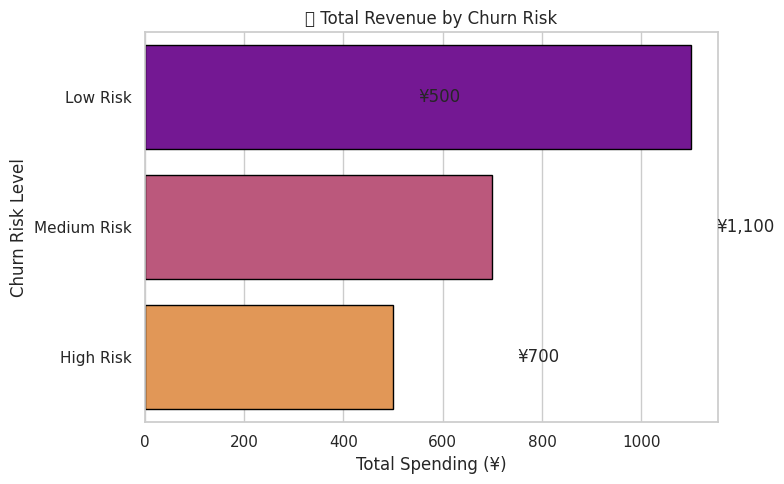

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group total spending by churn risk
revenue_by_churn = df.groupby('Churn_risk')['Total_Spending'].sum().reset_index()

# Sort for better visual order
revenue_by_churn = revenue_by_churn.sort_values(by='Total_Spending', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=revenue_by_churn,
    x='Total_Spending',
    y='Churn_risk',
    palette='plasma',
    edgecolor='black'
)

# Annotate each bar with ¥ (Yuan)
for index, row in revenue_by_churn.iterrows():
    plt.text(row.Total_Spending + 50, index, f'¥{int(row.Total_Spending):,}', va='center')

plt.title('💸 Total Revenue by Churn Risk')
plt.xlabel('Total Spending (¥)')  # Update axis label to Yuan
plt.ylabel('Churn Risk Level')
plt.tight_layout()
plt.show()


# Reload original Excel file

In [95]:
# Reload original Excel file (if not already done)
df_raw = pd.read_excel('/content/590982 - Affiliate data analysis export -2025-06-27T09_15_37.xlsx')

# View original column names
print(df_raw.columns.tolist())


["Member's name", "Member's mobile phone number", 'Recently trained', '\t30-Day Active', '\t90-Day Active', 'Total Spending', 'Membership Rating', 'Churn risk', 'Coaches', 'Sales']


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [96]:
df = df_raw.copy()
df.columns = df.columns.str.strip().str.replace("'", "").str.replace(" ", "_")

# Then rename for clarity
df.rename(columns={'Old_Chinese_Name': 'Coaches'}, inplace=True)


In [97]:
# Clean column names: remove tabs, spaces, apostrophes
df.columns = df.columns.str.replace('\t', '', regex=False) \
                       .str.replace("'", "") \
                       .str.strip() \
                       .str.replace(" ", "_")

# Check columns again
print(df.columns.tolist())


['Members_name', 'Members_mobile_phone_number', 'Recently_trained', '30-Day_Active', '90-Day_Active', 'Total_Spending', 'Membership_Rating', 'Churn_risk', 'Coaches', 'Sales']


 # Merge Coach Frequency with Total Revenue per Coach                           
 Grouping the data by coach (supporting multiple coaches per row) and calculate the total spending each coach is associated with.

In [100]:
# Drop NaN values and clean non-ASCII characters
df['Coaches'] = df['Coaches'].dropna().str.encode('ascii', errors='ignore').str.decode('ascii')

# Handle multiple coaches per row
df_exploded = df.copy()
df_exploded = df_exploded.dropna(subset=['Coaches', 'Total_Spending'])
df_exploded['Coaches'] = df_exploded['Coaches'].str.split(',')  # list of coaches
df_exploded = df_exploded.explode('Coaches')                    # one row per coach
df_exploded['Coaches'] = df_exploded['Coaches'].str.strip()

# Total revenue per coach
revenue_per_coach = df_exploded.groupby('Coaches')['Total_Spending'].sum().sort_values(ascending=False)
revenue_per_coach = revenue_per_coach.reset_index().rename(columns={'Total_Spending': 'Total_Revenue'})
revenue_per_coach.head(10)


,Coaches,Total_Revenue
0,Theresa (EN | ),1276764.63
1,Yinai (EN | ),1037023.65
2,Biljana,1005606.32
3,Guest Teacher,918938.99
4,(EN),690512.65
5,Monica - (EN),674401.03
6,Ross (EN),662789.58
7,Hasina (EN),628502.61
8,Fangping (EN | ),580601.53
9,Jelena (EN),578327.69


# Analyze Churn Risk Distribution by Coach
This gives insight into which coaches are associated with low or high churn-risk members.

In [103]:
# Count churn categories per coach
churn_by_coach = df_exploded.groupby(['Coaches', 'Churn_risk']).size().unstack(fill_value=0)

# Optional: show top coaches with lowest churn (by sorting)
churn_by_coach['Total'] = churn_by_coach.sum(axis=1)
churn_by_coach['Low_Churn_%'] = churn_by_coach.get('Low', 0) / churn_by_coach['Total'] * 100
churn_by_coach.sort_values(by='Low_Churn_%', ascending=False).head(10)


Churn_risk,--,High risk,Low risk,Medium risk,No risk of churn,中风险,无流失风险,高风险,Total,Low_Churn_%
Coaches,,,,,,,,,,
(EN),275,99,1,45,74,2,1,0,497,0.0
Alaia,5,3,0,1,2,0,0,0,11,0.0
Alessandra (EN | IT),6,55,4,16,30,1,0,0,112,0.0
Alice,22,1,0,0,3,0,0,0,26,0.0
Alicia,65,11,0,4,15,0,0,0,95,0.0
Alvaro,10,0,0,1,4,0,0,0,15,0.0
Amy (EN | ),115,48,1,37,49,0,1,1,252,0.0
Ana,9,2,0,0,0,0,0,0,11,0.0
Ana (EN | RU),27,27,1,23,44,0,0,0,122,0.0


# Plot Coaches with Highest Average Member Spending
This shows which coaches are associated with members who spend the most on average.

/tmp/ipython-input-104-282359805.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=top_avg, x='Average_Spending', y='Coaches', palette='viridis')
/tmp/ipython-input-104-282359805.py:20: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


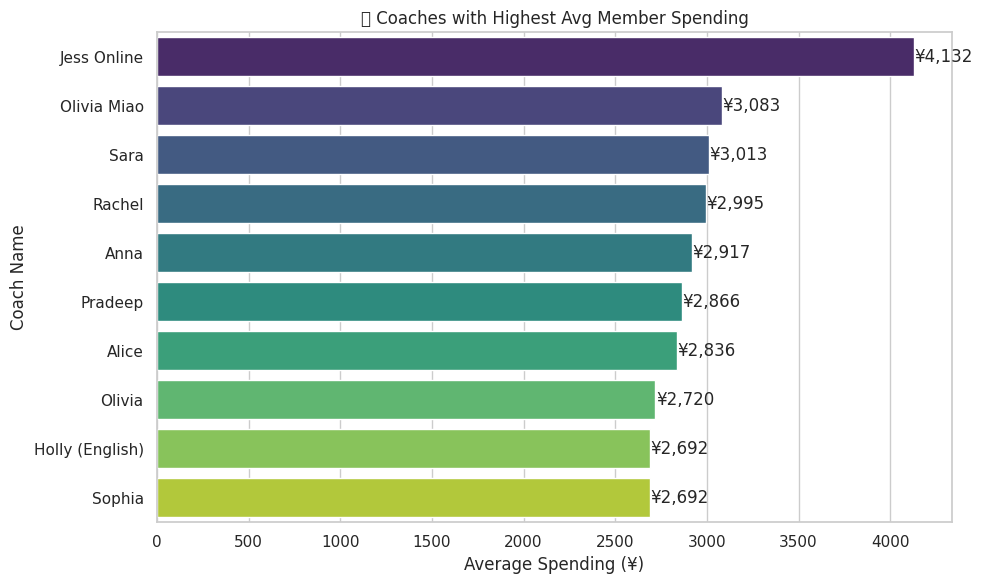

In [104]:
# Average revenue per coach
avg_spending_per_coach = df_exploded.groupby('Coaches')['Total_Spending'].mean().sort_values(ascending=False)
avg_spending_per_coach = avg_spending_per_coach.reset_index().rename(columns={'Total_Spending': 'Average_Spending'})

# Plot top 10
import seaborn as sns
import matplotlib.pyplot as plt

top_avg = avg_spending_per_coach.head(10)

plt.figure(figsize=(10, 6))
bars = sns.barplot(data=top_avg, x='Average_Spending', y='Coaches', palette='viridis')
for bar in bars.patches:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f"¥{bar.get_width():,.0f}", va='center')

plt.title('🏆 Coaches with Highest Avg Member Spending')
plt.xlabel('Average Spending (¥)')
plt.ylabel('Coach Name')
plt.tight_layout()
plt.show()


In [105]:
# Drop NaN and clean coaches
df_exploded = df.copy()
df_exploded = df_exploded.dropna(subset=['Coaches', 'Total_Spending', 'Churn_risk'])

# Handle multiple coaches per row
df_exploded['Coaches'] = df_exploded['Coaches'].str.encode('ascii', errors='ignore').str.decode('ascii')
df_exploded['Coaches'] = df_exploded['Coaches'].str.split(',')
df_exploded = df_exploded.explode('Coaches')
df_exploded['Coaches'] = df_exploded['Coaches'].str.strip()


In [106]:
# Total revenue per coach
revenue_per_coach = df_exploded.groupby('Coaches')['Total_Spending'].sum().rename('Total_Revenue')

# Average spending per coach
avg_spending_per_coach = df_exploded.groupby('Coaches')['Total_Spending'].mean().rename('Average_Spending')

# Churn rate per coach: % of 'High' risk members
churn_rate = df_exploded.groupby(['Coaches', 'Churn_risk']).size().unstack(fill_value=0)
churn_rate['Total'] = churn_rate.sum(axis=1)
churn_rate['High_Churn_%'] = churn_rate.get('High', 0) / churn_rate['Total'] * 100


#  Combine into One DataFrame

In [107]:
# Merge all three
coach_dashboard = revenue_per_coach.to_frame().join(avg_spending_per_coach).join(churn_rate['High_Churn_%'])

# Reset index for plotting
coach_dashboard = coach_dashboard.reset_index()

# Show the top 10 rows
coach_dashboard.head(10)


,Coaches,Total_Revenue,Average_Spending,High_Churn_%
0,(EN),690512.65,1389.361469,0.0
1,Alaia,9929.80,902.709091,0.0
2,Alessandra (EN | IT),125741.27,1122.689911,0.0
3,Alice,73738.17,2836.083462,0.0
4,Alicia,205060.81,2158.534842,0.0
5,Alvaro,31730.04,2115.336000,0.0
6,Amy (EN | ),370460.31,1470.080595,0.0
7,Ana,4922.60,447.509091,0.0
8,Ana (EN | RU),218977.53,1794.897787,0.0
9,Angela (EN/,5353.00,892.166667,0.0


 #    Confirm values exist Churn

In [123]:
df[['Churn_risk', '30-Day_Active', '90-Day_Active']].dropna().head(10)


,Churn_risk,30-Day_Active,90-Day_Active
0,No risk of churn,9,13
1,No risk of churn,11,31
2,Medium risk,2,6
3,No risk of churn,9,22
4,No risk of churn,5,22
5,--,0,0
6,No risk of churn,8,36
7,Medium risk,2,7
8,--,0,0
9,--,0,0


# Count how many are "High" churn

In [121]:
df['Churn_risk'].value_counts()


,count
Churn_risk,
--,3240
High risk,3149
No risk of churn,106
Medium risk,79
高风险,15
Low risk,13
中风险,3
High riska,1
无流失风险,1


# 💡 What This Does:
Filters members who spent more than ¥300

But only attended ≤ 2 sessions in the past 30 days

Useful for re-engagement campaigns targeting top customers going inactive.



In [136]:
# High spenders but low activity (<=2 sessions in last 30 days, spending > ¥300)
low_active_high_spend = df[(df['Total_Spending'] > 300) & (df['30-Day_Active'] <= 2)]

# Print count of such members
print(f"Loyal spenders with low activity: {low_active_high_spend.shape[0]}")

# Display relevant info
print(low_active_high_spend[['Members_name', 'Total_Spending', '30-Day_Active']])


Loyal spenders with low activity: 1274
                                Members_name  Total_Spending  30-Day_Active
5                                      Lainy         1150.00              0
9                                      Tania          400.00              0
12    Alice Xin Liu 刘欣 (Alice Xin Liu 刘欣 🧘🏾)          700.00              0
15                            Valérie （V@le）         1030.00              0
17                   Marcia (Marcia Cortes )         2656.66              0
...                                      ...             ...            ...
6545                    小佳  (一时一世瑜伽·普拉提｜小佳 )          440.00              1
6546                            ko2 (KO.2💋 )          440.00              1
6559                              微信用户 (N/A)          360.00              1
6580      范英雄 (Donnie fan (slow responder) )          360.00              1
6587          michelle （(Michellelovestar )）          360.00              1

[1274 rows x 3 columns]


In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by spending and pick top 10
top_inactive_spenders = low_active_high_spend.sort_values(by='Total_Spending', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_inactive_spenders,
    x='Total_Spending',
    y='Members_name',
    palette='coolwarm'
)

# Add value labels
for i, row in top_inactive_spenders.iterrows():
    plt.text(row['Total_Spending'] + 10, i, f"¥{int(row['Total_Spending']):,}", va='center')

plt.title("💸 Top High-Spending Members With Low Activity (≤ 2 classes in 30 days)")
plt.xlabel("Total Spending (¥)")
plt.ylabel("Member Name")
plt.tight_layout()
plt.show()


In [143]:
# Select base table
merged_inactive = low_active_high_spend[['Members_name', 'Total_Spending', '30-Day_Active']].copy()

# Merge 'Churn_risk' and 'Coaches' from main df
merged_inactive = pd.merge(
    merged_inactive,
    df[['Members_name', 'Churn_risk', 'Coaches']],
    on='Members_name',
    how='left'
)

# Preview
merged_inactive.head()


,Members_name,Total_Spending,30-Day_Active,Churn_risk,Coaches
0,Lainy,1150.0,0,--,"Tania May, Guy, Ross (EN), Masooma"
1,Tania,400.0,0,--,"Chloe, Rachel, Bruno, Lucy, Theresa (EN | ),..."
2,Tania,400.0,0,--,"Christine, Vicky"
3,Alice Xin Liu 刘欣 (Alice Xin Liu 刘欣 🧘🏾),700.0,0,--,"Tania May, Guy, Jaymi, Chloe, Gabi, Valrie, Ka..."
4,Valérie （V@le）,1030.0,0,--,"Satya, Rachel, Valrie, Alvaro, Guest Teacher, ..."


In [144]:
# Save as Excel file
merged_inactive.to_excel('high_spender_low_activity_report.xlsx', index=False)


In [149]:
!pip install streamlit pyngrok --quiet


In [151]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Taozi Tree Yoga Dashboard", layout="wide")
st.title("🧘 Taozi Tree Yoga Member Dashboard")

uploaded_file = st.file_uploader("📂 Upload your Excel file", type=["xlsx"])

if uploaded_file is not None:
    df = pd.read_excel(uploaded_file)

    df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("'", "")

    st.subheader("🔍 Preview of Uploaded Data")
    st.dataframe(df.head())

    st.subheader("📊 KPIs")
    col1, col2, col3 = st.columns(3)
    col1.metric("🧍 Total Members", df['Members_name'].nunique())
    col2.metric("💰 Total Revenue (¥)", f"{df['Total_Spending'].sum():,.0f}")
    col3.metric("📈 Avg. 30-Day Activity", f"{df['30-Day_Active'].mean():.1f}")

    st.subheader("💡 Revenue by Churn Risk")
    churn_group = df.groupby("Churn_risk")["Total_Spending"].sum().reset_index()

    fig, ax = plt.subplots()
    sns.barplot(data=churn_group, x="Total_Spending", y="Churn_risk", palette="viridis", ax=ax)
    st.pyplot(fig)
else:
    st.warning("Please upload an Excel (.xlsx) file.")


Overwriting app.py


In [156]:
!pip install pyngrok


In [158]:
# Install pyngrok
!pip install pyngrok

# Set up your ngrok auth token
!ngrok config add-authtoken YOUR_AUTHTOKEN_HERE


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [168]:
!ngrok config add-authtoken 2zMuoRoWfG3g1T2mpLwKpvAZ6aA_2PPD1QfZbQsesSy2n48iS


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [178]:
!ngrok config add-authtoken 2zMuoRoWfG3g1T2mpLwKpvAZ6aA_2PPD1QfZbQsesSy2n48iS


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [180]:
# Overwrite the ngrok.yml with the correct format
!mkdir -p ~/.config/ngrok
!echo "authtoken: 2zMuoRoWfG3g1T2mpLwKpvAZ6aA_2PPD1QfZbQsesSy2n48iS" > ~/.config/ngrok/ngrok.yml


In [1]:
# Clean up old config and ngrok processes
!pkill ngrok
!rm -rf ~/.ngrok2 ~/.config/ngrok
!pip uninstall -y pyngrok
!pip install pyngrok

# Re-set your authtoken
from pyngrok import conf
conf.get_default().auth_token = "2zMuoRoWfG3g1T2mpLwKpvAZ6aA_2PPD1QfZbQsesSy2n48iS"


Found existing installation: pyngrok 7.2.11
Uninstalling pyngrok-7.2.11:
  Successfully uninstalled pyngrok-7.2.11
  Using cached pyngrok-7.2.11-py3-none-any.whl.metadata (9.4 kB)
Using cached pyngrok-7.2.11-py3-none-any.whl (25 kB)


In [13]:
import os
import time
from pyngrok import ngrok

# Kill previous tunnels
ngrok.kill()

# Run Streamlit in the background
!streamlit run app.py &>/content/log.txt &

# Wait for Streamlit to start
time.sleep(5)

# Connect ngrok to Streamlit default port
public_url = ngrok.connect(8501)
print("✅ Your Streamlit app is live at:")
print(public_url)


✅ Your Streamlit app is live at:
NgrokTunnel: "https://67e0-35-232-30-205.ngrok-free.app" -> "http://localhost:8501"


In [14]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (You can adjust this to use file uploader if needed)
@st.cache_data
def load_data():
    df = pd.read_excel('/content/590982 - Affiliate data analysis export -2025-06-27T09_15_37.xlsx')
    df.columns = df.columns.str.strip().str.replace("'", "").str.replace(" ", "_")
    return df

df = load_data()

# Sidebar navigation
st.sidebar.title("🧭 Dashboard Navigation")
page = st.sidebar.radio("Choose a Dashboard", ["Spending Dashboard", "Member Churn Dashboard", "Coach Analysis Dashboard"])

# --- 1. Spending Dashboard ---
if page == "Spending Dashboard":
    st.title("📊 Spending Overview")

    st.metric("Total Revenue", f"₦{df['Total_Spending'].sum():,.2f}")
    st.metric("Average Spending", f"₦{df['Total_Spending'].mean():,.2f}")

    st.subheader("Revenue by Membership Rating")
    rev = df.groupby("Membership_Rating")['Total_Spending'].sum().sort_values()
    st.bar_chart(rev)

# --- 2. Member Churn Dashboard ---
elif page == "Member Churn Dashboard":
    st.title("🙋 Churn Risk Analysis")

    churn_dist = df['Churn_risk'].value_counts()
    st.subheader("Churn Risk Distribution")
    st.dataframe(churn_dist)

    fig, ax = plt.subplots()
    churn_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_ylabel("")
    st.pyplot(fig)

# --- 3. Coach Analysis Dashboard ---
elif page == "Coach Analysis Dashboard":
    st.title("🧘 Coach Analysis")

    if 'Coaches' in df.columns:
        coaches_series = df['Coaches'].dropna()
        coaches_list = coaches_series.str.split(',').explode().str.strip()
        coach_counts = coaches_list.value_counts().head(10)

        st.subheader("Top 10 Coaches")
        st.bar_chart(coach_counts)
    else:
        st.warning("No 'Coaches' column found in data.")


2025-07-03 17:06:59.444 No runtime found, using MemoryCacheStorageManager
2025-07-03 17:06:59.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 17:06:59.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 17:06:59.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 17:06:59.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 17:06:59.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 17:06:59.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 17:06:59.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 17:06:59.462 Thread 'MainThread':

In [15]:
import os
import time
from pyngrok import ngrok

# Kill previous tunnels
ngrok.kill()

# Launch Streamlit
!streamlit run app.py --server.headless true > /content/log.txt 2>&1 &

time.sleep(5)

public_url = ngrok.connect(8501)
print("✅ Your Streamlit app is live at:")
print(public_url)


✅ Your Streamlit app is live at:
NgrokTunnel: "https://b234-35-232-30-205.ngrok-free.app" -> "http://localhost:8501"


In [19]:
!git clone git@github.com:Faith-InsightData/-THE-Taozi-Tree-Exploratory-Data-Analysis-EDA-co.git


Cloning into '-THE-Taozi-Tree-Exploratory-Data-Analysis-EDA-co'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
